In [2]:
import numpy as np
import pandas as pd

In [3]:
# Libraries that we cannot import for trading
import collections
import matplotlib.pyplot as plt
import re

In [4]:
def load_market_data(file, row_limit = None):
    md = pd.read_csv(file,sep=';')
    rename_columns = {'bid_price_1': 'bid', 'ask_price_1': 'ask', 'bid_volume_1': 'bid_sz', 'ask_volume_1': 'ask_sz'}
    md.rename(columns=rename_columns, inplace=True)
    if row_limit:
        markets = split_data_by_product(md.loc[md.timestamp <= row_limit])
    else:
        markets = split_data_by_product(md)
    symbols = list(markets.keys())
    print(f"Symbols: {symbols}")
    return markets

def split_data_by_product(df):
    markets = dict()
    df_grouped = df.groupby("product")
    symbols = list(df_grouped.groups.keys())
    for s in symbols:
        markets[s] = df_grouped.get_group(s).reset_index(drop=True)
    return markets

In [5]:
fig_size = (6,3)

def plot_pnl(results):
    f, ax = plt.subplots(figsize=fig_size)
    for product in results:
        ax.plot("timestamp", "profit_and_loss", data=results[product], label=product)
    ax.set_xlabel("Time")
    ax.set_ylabel("PnL")
    ax.legend()
    ax.set_title("PnL")
    return

def plot_quote(md, sym):
    f, ax = plt.subplots(figsize=fig_size)
    ax.plot("timestamp", "bid", data=md, color="red")
    ax.plot("timestamp", "ask", data=md, color="blue")
    ax.set_xlabel("Time")
    ax.set_ylabel("Price (Seashells)")
    ax.set_title(sym)
    return

def plot_price(md, sym, price_type):
    f, ax = plt.subplots(figsize=fig_size)
    ax.plot("timestamp", price_type, data=md)
    ax.set_xlabel("Time")
    ax.set_ylabel(price_type.capitalize())
    ax.set_title(sym)
    return

Symbols: ['BANANAS', 'PEARLS']
BANANAS 14681.546875
PEARLS 16131.0


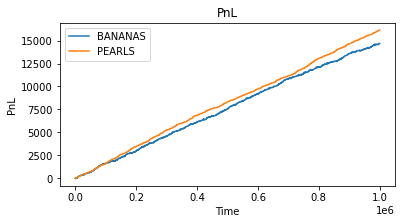

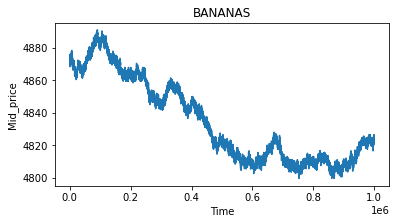

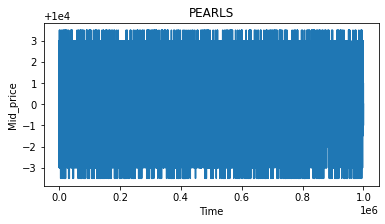

In [18]:
r1_results = load_market_data("round1_logs/ce085e51-1c16-4eba-b27f-d8b25dcbe8ee.csv")

for s in r1_results:
    print(f"{s} {r1_results[s]['profit_and_loss'].iloc[-1]}")
plot_pnl(r1_results)
for s in r1_results:
    plot_price(r1_results[s], s, 'mid_price')